In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [16]:
df = pd.read_csv(r"C:\Users\yashm\OneDrive\Desktop\Brainwave_Matrix_Intern\9. Sales-Data-Analysis.csv")

In [17]:
df.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,07-11-2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin


In [18]:
df.tail()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
249,10709,28-12-2022,Sides & Other,4.99,200.40,Drive-thru,Gift Card,Walter Muller,Berlin
250,10710,29-12-2022,Burgers,12.99,754.43,Drive-thru,Gift Card,Walter Muller,Berlin
251,10711,29-12-2022,Chicken Sandwiches,9.95,281.41,Drive-thru,Gift Card,Walter Muller,Berlin
252,10712,29-12-2022,Fries,3.49,630.37,Drive-thru,Gift Card,Walter Muller,Berlin
253,10713,29-12-2022,Beverages,2.95,677.97,Drive-thru,Gift Card,Walter Muller,Berlin


In [20]:
df.isnull().sum()

Order ID          0
Date              0
Product           0
Price             0
Quantity          0
Purchase Type     0
Payment Method    0
Manager           0
City              0
dtype: int64

In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
df.dtypes

Order ID            int64
Date               object
Product            object
Price             float64
Quantity          float64
Purchase Type      object
Payment Method     object
Manager            object
City               object
dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    float64
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.0+ KB


In [24]:
df.shape

(254, 9)

In [25]:
df.columns

Index(['Order ID', 'Date', 'Product', 'Price', 'Quantity', 'Purchase Type',
       'Payment Method', 'Manager', 'City'],
      dtype='object')

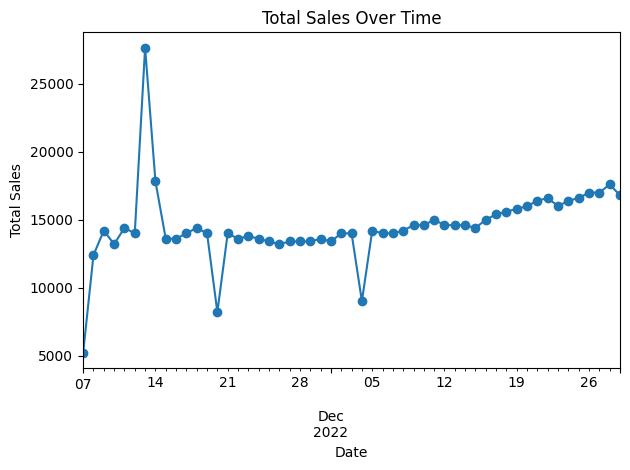

In [26]:
# Create Total Sales column
df['Total Sales'] = df['Price'] * df['Quantity']

# Convert 'Date' column to datetime with day-first format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Extract hour if needed
df['Hour'] = df['Date'].dt.hour

# 1. Total Sales Over Time
sales_over_time = df.groupby('Date')['Total Sales'].sum()
sales_over_time.plot(title='Total Sales Over Time', marker='o')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


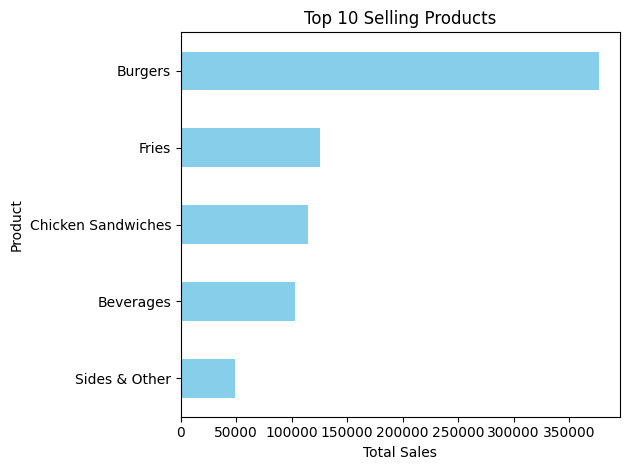

In [27]:
# 2. Top-Selling Products
top_products = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', color='skyblue', title='Top 10 Selling Products')
plt.xlabel('Total Sales')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

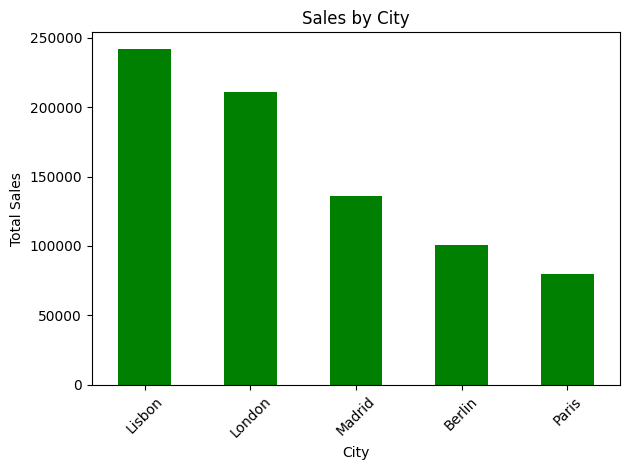

In [28]:
# 3. Sales Distribution by City
city_sales = df.groupby('City')['Total Sales'].sum().sort_values(ascending=False)
city_sales.plot(kind='bar', color='green', title='Sales by City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

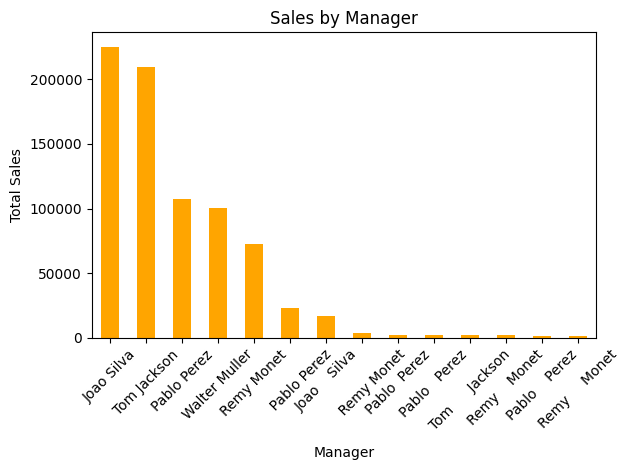

In [29]:
# 4. Sales by Manager
manager_sales = df.groupby('Manager')['Total Sales'].sum().sort_values(ascending=False)
manager_sales.plot(kind='bar', color='orange', title='Sales by Manager')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

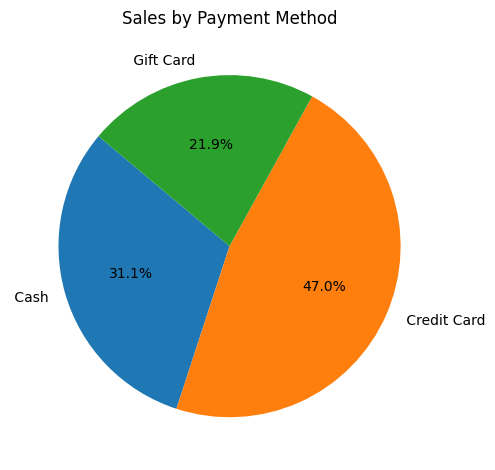

In [30]:
# 5. Sales by Payment Method
payment_sales = df.groupby('Payment Method')['Total Sales'].sum()
payment_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, title='Sales by Payment Method')
plt.ylabel('')
plt.tight_layout()
plt.show()

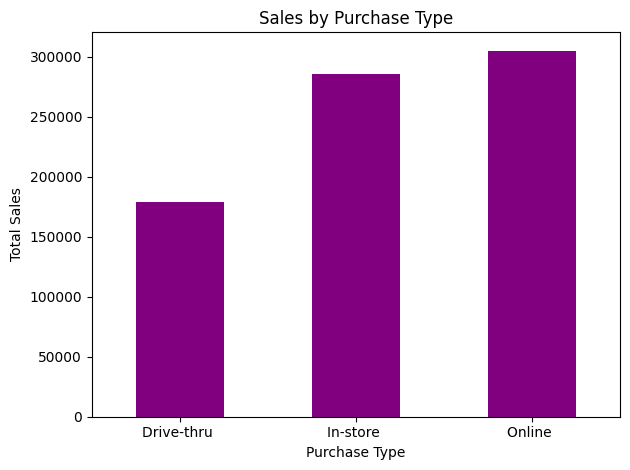

In [31]:
# 6. Sales by Purchase Type
purchase_type_sales = df.groupby('Purchase Type')['Total Sales'].sum()
purchase_type_sales.plot(kind='bar', color='purple', title='Sales by Purchase Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

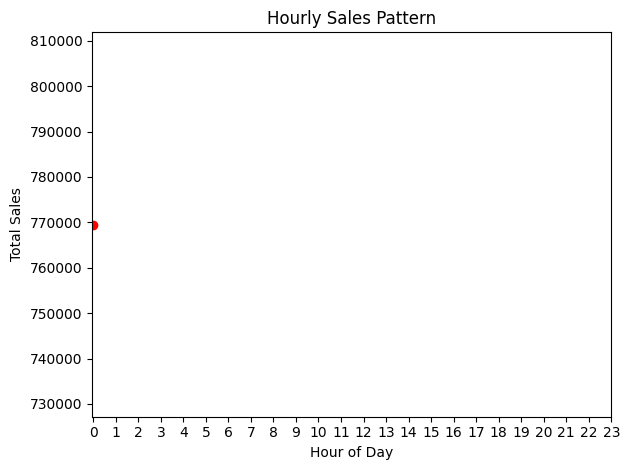

In [32]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Use 'coerce' to handle invalid formats

# Now extract hour
df['Hour'] = df['Date'].dt.hour

# Group and plot
hourly_sales = df.groupby('Hour')['Total Sales'].sum()
hourly_sales.plot(kind='line', marker='o', color='red', title='Hourly Sales Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

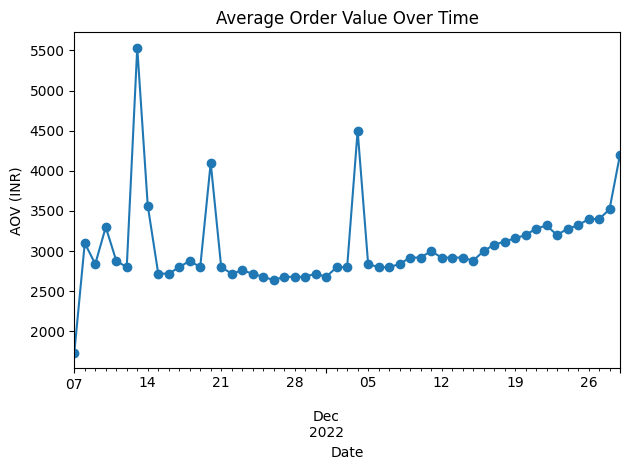

In [33]:
# 8. Average Order Value Over Time
aov = df.groupby('Date').apply(lambda x: x['Total Sales'].sum() / x['Order ID'].nunique())
aov.plot(marker='o', title='Average Order Value Over Time')
plt.ylabel('AOV (INR)')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

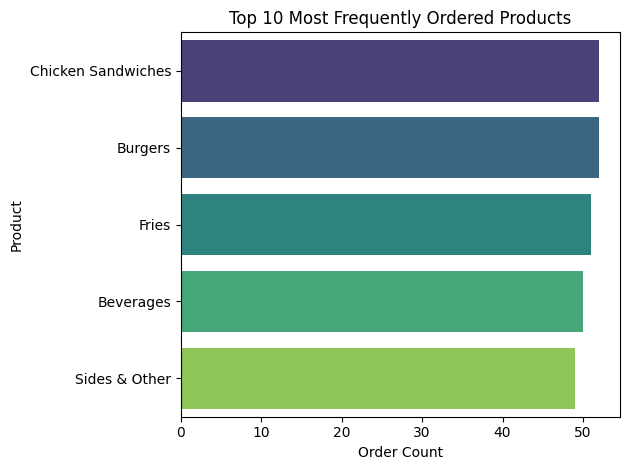

In [34]:
# 9. Product Order Frequency
product_counts = df['Product'].value_counts().head(10)
sns.barplot(x=product_counts.values, y=product_counts.index, palette='viridis')
plt.title('Top 10 Most Frequently Ordered Products')
plt.xlabel('Order Count')
plt.tight_layout()
plt.show()

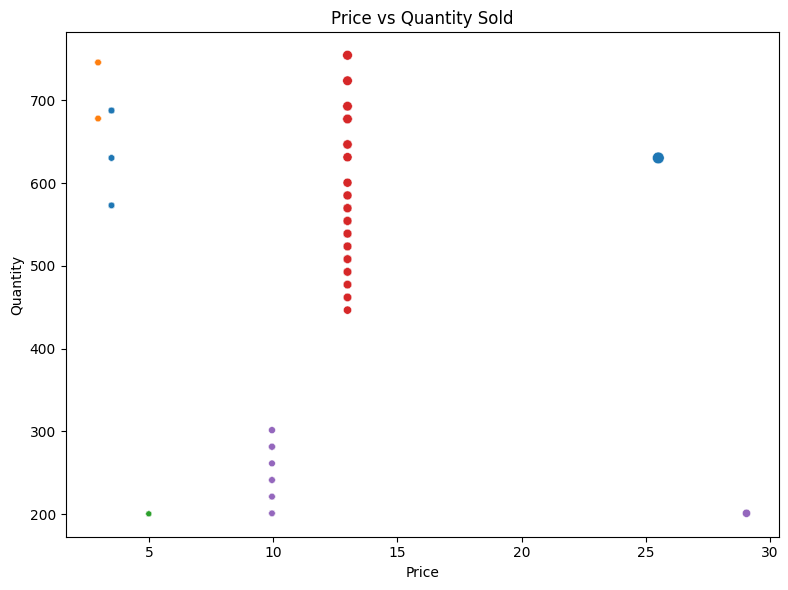

In [35]:
# 10. Price vs Quantity Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Price', y='Quantity', size='Total Sales', hue='Product', legend=False)
plt.title('Price vs Quantity Sold')
plt.tight_layout()
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [39]:
# 2. Feature Engineering
df['Total Sales'] = df['Price'] * df['Quantity']
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Drop columns that are not helpful or IDs
df.drop(['Order ID', 'Date'], axis=1, inplace=True)

# 3. Handle missing values if any
df.dropna(inplace=True)

# 4. Encode categorical columns
le = LabelEncoder()
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# 5. Define features and target
X = df.drop('Purchase Type', axis=1)
y = df['Purchase Type']

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# 8. Train and evaluate
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    accuracies[name] = acc

# 9. Display Accuracy
print("Model Accuracies (%):\n")
for model, acc in accuracies.items():
    print(f"{model}: {acc:.2f}%")

Model Accuracies (%):

Logistic Regression: 76.47%
Decision Tree: 100.00%
Random Forest: 98.04%
Naive Bayes: 82.35%
SVM: 45.10%
KNN: 56.86%


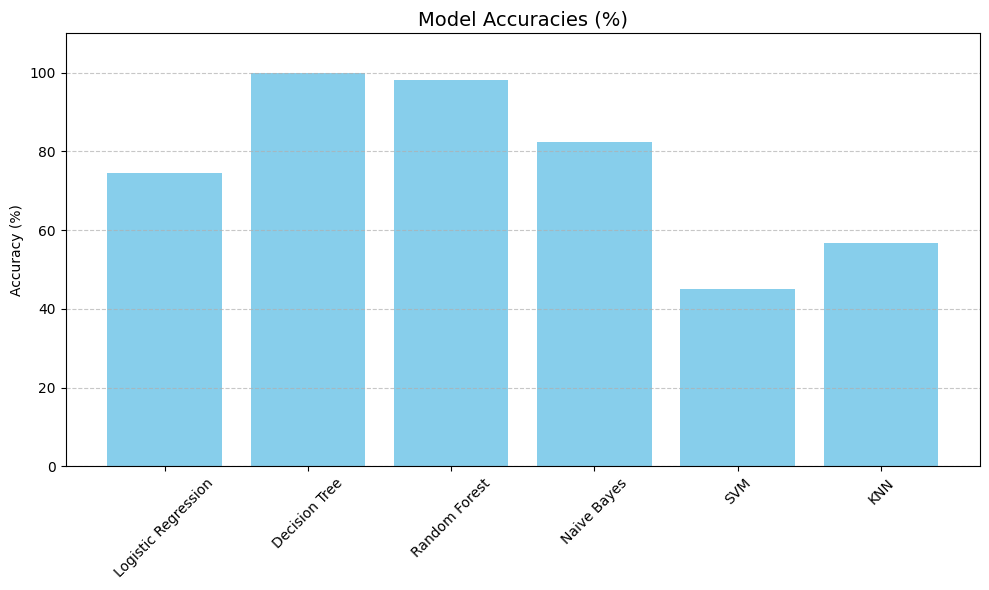

In [41]:
# Model accuracies (as given)
accuracies = {
    'Logistic Regression': 74.51,
    'Decision Tree': 100.00,
    'Random Forest': 98.04,
    'Naive Bayes': 82.35,
    'SVM': 45.10,
    'KNN': 56.86
}

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.title('Model Accuracies (%)', fontsize=14)
plt.ylabel('Accuracy (%)')
plt.ylim(0, 110)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()